In [1]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head() #inspecting the dataframe

,player,goals,assists,points,plus_minus,penalty_minutes,power_play_goals,short_handed_goals,shots,shot_percentage,shifts,minutes_on_ice,team,versus,date
0,Matt Bartkowski,0,0,0,0,0,0,0,2,0.0,17,13.6,CGY,EDM,2017-10-04
1,Sam Bennett,0,0,0,-2,0,0,0,0,0.0,18,15.2,CGY,EDM,2017-10-04
2,T.J. Brodie,0,0,0,-3,0,0,0,1,0.0,28,23.8,CGY,EDM,2017-10-04
3,Troy Brouwer,0,0,0,-2,0,0,0,0,0.0,19,15.5,CGY,EDM,2017-10-04
4,Micheal Ferland,0,0,0,-1,0,0,0,4,0.0,18,15.6,CGY,EDM,2017-10-04


In [4]:
df.describe() #understand the dataframe

,goals,assists,points,plus_minus,penalty_minutes,power_play_goals,short_handed_goals,shots,shot_percentage,shifts,minutes_on_ice
count,96077.000000,96077.000000,96077.000000,96077.000000,96077.000000,96077.000000,96077.000000,96077.000000,96077.000000,96077.000000,96077.000000
mean,0.150764,0.254848,0.405612,-0.008066,0.509976,0.032349,0.004361,1.680132,0.067103,21.847966,16.499115
std,0.401779,0.521999,0.672193,1.101526,1.422007,0.183510,0.066367,1.522086,0.197881,5.290250,4.733410
min,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,13.300000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,22.000000,16.600000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.000000,19.700000
max,4.000000,5.000000,5.000000,6.000000,29.000000,3.000000,2.000000,15.000000,1.000000,43.000000,36.600000


In [5]:
# calculate game played per player
game_attend = df.groupby(['player'])['goals'].count() 

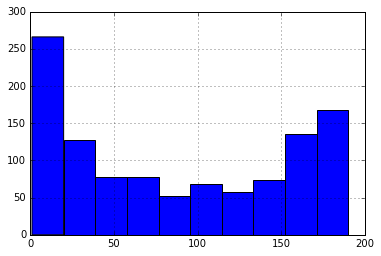

In [6]:
game_attend.hist()

In [7]:
# Genrating the dataframe with the mean of all metrics per player
player_mean = df.groupby(['player']).mean() 

In [8]:
# Adding the metric "number of game_attended per player"
player_mean['game_attended'] = game_attend  

In [9]:
# Filter out the players who have played less then 10% percentile number of game played per player
player_mean =  player_mean[player_mean['game_attended'] > player_mean['game_attended'].quantile(.1)] 

In [10]:
player_mean.head()

,goals,assists,points,plus_minus,penalty_minutes,power_play_goals,short_handed_goals,shots,shot_percentage,shifts,minutes_on_ice,game_attended
player,,,,,,,,,,,,
A.J. Greer,0.00000,0.181818,0.181818,-0.272727,2.000000,0.00000,0.000000,1.272727,0.000000,15.818182,10.663636,11
Aaron Ekblad,0.16568,0.218935,0.384615,-0.005917,0.733728,0.04142,0.005917,2.763314,0.061899,24.668639,21.862130,169
Aaron Ness,0.00000,0.166667,0.166667,0.277778,0.555556,0.00000,0.000000,0.555556,0.000000,18.222222,12.583333,18
Adam Clendening,0.00000,0.222222,0.222222,0.111111,0.518519,0.00000,0.000000,1.259259,0.000000,20.407407,15.166667,27
Adam Cracknell,0.12000,0.088000,0.208000,0.064000,0.256000,0.00000,0.008000,1.280000,0.061728,16.272000,11.100800,125


In [11]:
#feature nomalization
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(player_mean)
player = pd.DataFrame(np_scaled, columns = player_mean.columns, index = player_mean.index )

In [12]:
player.head()

,goals,assists,points,plus_minus,penalty_minutes,power_play_goals,short_handed_goals,shots,shot_percentage,shifts,minutes_on_ice,game_attended
player,,,,,,,,,,,,
A.J. Greer,0.000000,0.225037,0.154239,0.342246,0.507463,0.000000,0.000000,0.285903,0.000000,0.297900,0.240115,0.032432
Aaron Ekblad,0.305115,0.270977,0.326275,0.467804,0.186170,0.187906,0.071006,0.620744,0.216368,0.664435,0.740110,0.886486
Aaron Ness,0.000000,0.206284,0.141386,0.601307,0.140962,0.000000,0.000000,0.124799,0.000000,0.397462,0.325827,0.070270
Adam Clendening,0.000000,0.275046,0.188514,0.522876,0.131564,0.000000,0.000000,0.282877,0.000000,0.487960,0.441168,0.118919
Adam Cracknell,0.220990,0.108918,0.176449,0.500706,0.064955,0.000000,0.096000,0.287536,0.215769,0.316695,0.259634,0.648649


In [13]:
# Using a very simple linear model containing two features(points and plus/minus)  
player['performance'] = player['points']*0.5 + player['plus_minus']*0.5 

In [14]:
# Top5 ranked by performances
top = player.sort_values(by='performance', ascending=False).head(5)

In [15]:
top 

,goals,assists,points,plus_minus,penalty_minutes,power_play_goals,short_handed_goals,shots,shot_percentage,shifts,minutes_on_ice,game_attended,performance
player,,,,,,,,,,,,,
Connor McDavid,0.682972,1.000000,1.000000,0.554733,0.087378,0.270393,0.07947,0.629283,0.505341,0.636196,0.680446,0.789189,0.777367
Patrick Kane,0.876476,0.867055,0.998017,0.543567,0.097693,0.630755,0.00000,0.789235,0.481424,0.619027,0.689583,0.983784,0.770792
Nikita Kucherov,0.920792,0.697098,0.901944,0.551724,0.122491,0.756098,0.00000,0.695860,0.562954,0.569148,0.615810,0.913514,0.726834
Evgeni Malkin,0.875079,0.737356,0.908479,0.527326,0.291521,0.836533,0.00000,0.665947,0.534413,0.598267,0.606051,0.735135,0.717902
Nicklas Backstrom,0.504383,0.890832,0.842911,0.572499,0.119593,0.317850,0.00000,0.416367,0.463252,0.588471,0.599040,0.821622,0.707705


In [16]:
player_mean.ix[top.iloc[0].name]

goals                   0.370861
assists                 0.807947
points                  1.178808
plus_minus              0.178808
penalty_minutes         0.344371
power_play_goals        0.059603
short_handed_goals      0.006623
shots                   2.801325
shot_percentage         0.144570
shifts                 23.986755
minutes_on_ice         20.525828
game_attended         151.000000
Name: Connor McDavid, dtype: float64

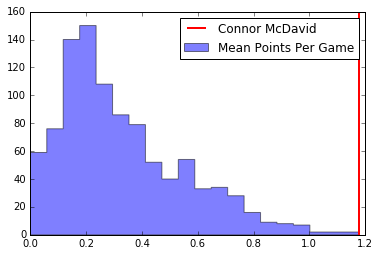

In [17]:
fig, ax = plt.subplots()

ax.hist(player_mean['points'], bins=20, color='blue', label='Mean Points Per Game',
        alpha=0.5, histtype='stepfilled')
ax.axvline(player_mean.ix[top.iloc[0].name].points, color='red', linewidth=2, label='Connor McDavid')

ax.legend(loc='upper right')

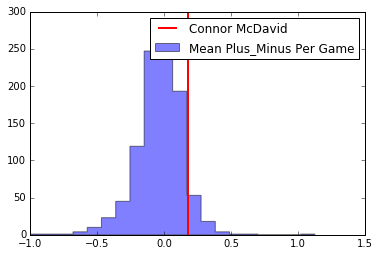

In [18]:
fig, ax = plt.subplots()

ax.hist(player_mean['plus_minus'], bins=20, color='blue', label='Mean Plus_Minus Per Game',
        alpha=0.5, histtype='stepfilled')
ax.axvline(player_mean.ix[top.iloc[0].name].plus_minus, color='red', linewidth=2, label='Connor McDavid')

ax.legend(loc='upper right')

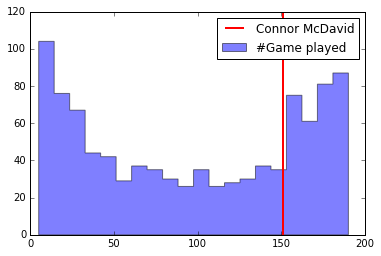

In [19]:
fig, ax = plt.subplots()

ax.hist(player_mean['game_attended'], bins=20, color='blue', label='#Game played',
        alpha=0.5, histtype='stepfilled')
ax.axvline(player_mean.ix[top.iloc[0].name].game_attended, color='red', linewidth=2, label='Connor McDavid')

ax.legend(loc='upper right')